1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.
2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?
3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?
4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [ ]:
#loading the helper functions
!wget "https://raw.githubusercontent.com/SangeethKumarPG/DS-DL/main/helper_functions.py"

--2024-04-14 16:07:43--  https://raw.githubusercontent.com/SangeethKumarPG/DS-DL/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10128 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.89K  --.-KB/s    in 0s      

2024-04-14 16:07:43 (39.0 MB/s) - ‘helper_functions.py’ saved [10128/10128]



In [ ]:
#importing the necessary functions
from helper_functions import create_tensorboard_callback, plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


In [ ]:
#loading the 10% food dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#unzipping the data
unzip_data("10_food_classes_10_percent.zip")

--2024-04-14 16:07:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   236MB/s    in 0.7s    

2024-04-14 16:07:50 (236 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
#walking through the data
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
#creating test and train directories
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir_10_percent = "10_food_classes_10_percent/test/"

#creating image shape
IMG_SIZE = (224,224)

#defining batch size
BATCH_SIZE = 32

# creating test and train datasets
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_10_percent,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir_10_percent,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#defining checkpoint path for model checkpoint callback
checkpoint_path = "model_checkpoints/model_1.ckpt"
#creating a model checkpoint callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    verbose=1,
    save_freq="epoch",
    save_best_only=False
)

In [ ]:
#creating a sequential model for augmenting images
augmented_layer = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
], name="augmentation_layer")

#creating a base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
#freezing the weight of base model
base_model.trainable=False

#creating input layer
inputs = layers.Input(shape=(224,224,3), name="input_layer")

#passing the input layer to augmenting model
x = augmented_layer(inputs)

#passing the augmented inputs to base model
x = base_model(x)

#creating a global average pooling layer for pooling the outputs of basemodel
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_2d")(x)

#creating output layer
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

#creating a model by combining inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)

#compiling the model
model_1.compile(optimizer=Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"],
                )


24274472/24274472 [==============================] - 0s 0us/step


In [ ]:
#fitting the model for 10 epochs
history_model_1 = model_1.fit(train_data_10_percent,
            epochs=10,
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            callbacks=[model_checkpoint_callback])

Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 2.0282 - accuracy: 0.3253
Epoch 1: saving model to model_checkpoints/model_1.ckpt
24/24 [==============================] - 31s 828ms/step - loss: 2.0282 - accuracy: 0.3253 - val_loss: 1.5590 - val_accuracy: 0.6036
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.4664 - accuracy: 0.6027
Epoch 2: saving model to model_checkpoints/model_1.ckpt
24/24 [==============================] - 15s 589ms/step - loss: 1.4664 - accuracy: 0.6027 - val_loss: 1.1105 - val_accuracy: 0.7418
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 1.1867 - accuracy: 0.6880
Epoch 3: saving model to model_checkpoints/model_1.ckpt
24/24 [==============================] - 15s 627ms/step - loss: 1.1867 - accuracy: 0.6880 - val_loss: 0.8984 - val_accuracy: 0.7681
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 0.9992 - accuracy: 0.7413
Epoch 4: saving model to model_checkpoints/model_1.ckpt
24/2

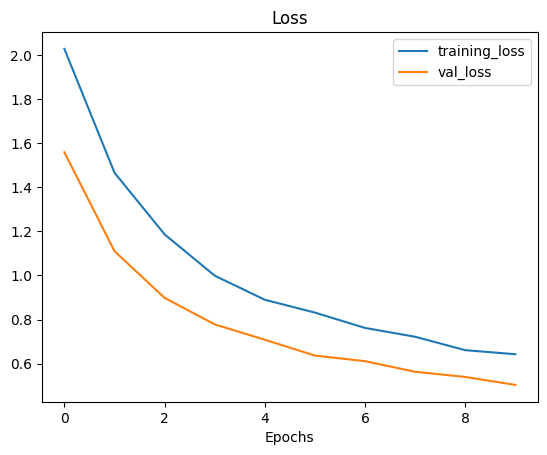

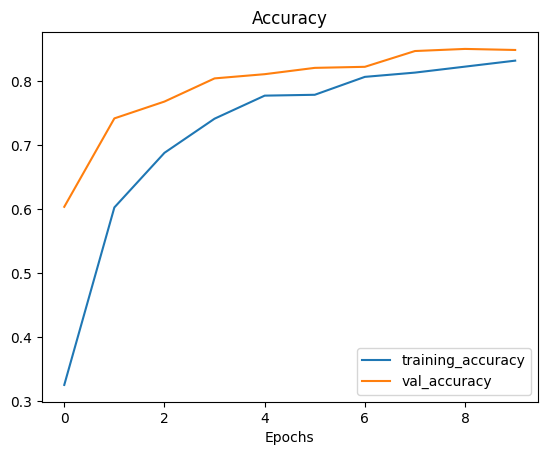

In [ ]:
plot_loss_curves(history_model_1)

In [ ]:
#checking if layer are trainable in the model
for layer_number, layer in enumerate(model_1.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 augmentation_layer True
2 efficientnetv2-b0 False
3 global_avg_pooling_2d True
4 output_layer True


In [ ]:
#checking for trainable layers in layer2 of the model
for layer_number, layer in enumerate(model_1.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [ ]:
#making all the layers of the model trainable
for layer in model_1.layers:
  layer.trainable = True

In [ ]:
#checking for trainable layers in layer2 of the model
for layer_number, layer in enumerate(model_1.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 True
1 rescaling True
2 normalization True
3 stem_conv True
4 stem_bn True
5 stem_activation True
6 block1a_project_conv True
7 block1a_project_bn True
8 block1a_project_activation True
9 block2a_expand_conv True
10 block2a_expand_bn True
11 block2a_expand_activation True
12 block2a_project_conv True
13 block2a_project_bn True
14 block2b_expand_conv True
15 block2b_expand_bn True
16 block2b_expand_activation True
17 block2b_project_conv True
18 block2b_project_bn True
19 block2b_drop True
20 block2b_add True
21 block3a_expand_conv True
22 block3a_expand_bn True
23 block3a_expand_activation True
24 block3a_project_conv True
25 block3a_project_bn True
26 block3b_expand_conv True
27 block3b_expand_bn True
28 block3b_expand_activation True
29 block3b_project_conv True
30 block3b_project_bn True
31 block3b_drop True
32 block3b_add True
33 block4a_expand_conv True
34 block4a_expand_bn True
35 block4a_expand_activation True
36 block4a_dwconv2 True
37 block4a_bn True
38 block4a_activ

In [ ]:
#freezing all layers of the base model except the top20 layers
for layer in model_1.layers[2].layers[:-20]:
  layer.trainable=False

In [ ]:
#checking for trainable layers in layer2 of the model
for layer_number, layer in enumerate(model_1.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [ ]:
#checking the number of trainable variables in the model
len(model_1.trainable_variables)

18

In [ ]:
len(model_1.layers[2].trainable_variables)

16

In [ ]:
#recompiling the model_1
model_1.compile(optimizer=Adam(learning_rate=0.0001),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
#finetuning the model for 10 epochs
initial_epochs=10
fine_tune_epochs=20

#fitting and finetuning the model
fine_tune_20_layers_history = model_1.fit(
    train_data_10_percent,
    initial_epoch=initial_epochs,
    epochs=fine_tune_epochs,
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

Epoch 11/20
24/24 [==============================] - 29s 666ms/step - loss: 0.8585 - accuracy: 0.7867 - val_loss: 0.5448 - val_accuracy: 0.8602
Epoch 12/20
24/24 [==============================] - 14s 546ms/step - loss: 0.7558 - accuracy: 0.8120 - val_loss: 0.5299 - val_accuracy: 0.8602
Epoch 13/20
24/24 [==============================] - 14s 556ms/step - loss: 0.7061 - accuracy: 0.8200 - val_loss: 0.5204 - val_accuracy: 0.8470
Epoch 14/20
24/24 [==============================] - 11s 475ms/step - loss: 0.6436 - accuracy: 0.8613 - val_loss: 0.5050 - val_accuracy: 0.8569
Epoch 15/20
24/24 [==============================] - 16s 686ms/step - loss: 0.6098 - accuracy: 0.8547 - val_loss: 0.4860 - val_accuracy: 0.8536
Epoch 16/20
24/24 [==============================] - 13s 522ms/step - loss: 0.6088 - accuracy: 0.8627 - val_loss: 0.4600 - val_accuracy: 0.8635
Epoch 17/20
24/24 [==============================] - 13s 550ms/step - loss: 0.5402 - accuracy: 0.8800 - val_loss: 0.4451 - val_accuracy:

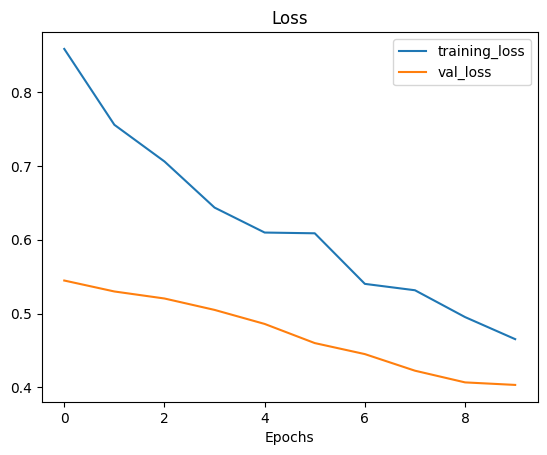

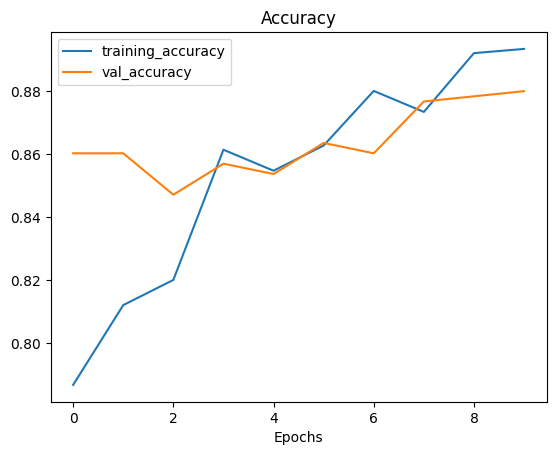

In [ ]:
plot_loss_curves(fine_tune_20_layers_history)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# creating a function to compare history's
def compare_historys(original_history, new_history, initial_epochs=10):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history['val_loss']

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(7,7))
  plt.subplot(2,1,1)
  plt.xticks(np.arange(1,21))
  plt.plot(total_acc, label="training accuracy")
  plt.plot(total_val_acc, label="validation accuracy")
  plt.plot([initial_epochs -1, initial_epochs-1], plt.ylim(), label="start epoch")
  plt.legend(loc="lower right")

  plt.subplot(2,1,2)
  plt.plot(total_loss, label="training loss")
  plt.xticks(np.arange(1,21))
  plt.plot(total_val_loss, label="validation loss")
  plt.plot([initial_epochs -1, initial_epochs-1], plt.ylim(), label="start epoch")
  plt.legend(loc="upper right")
  plt.show()

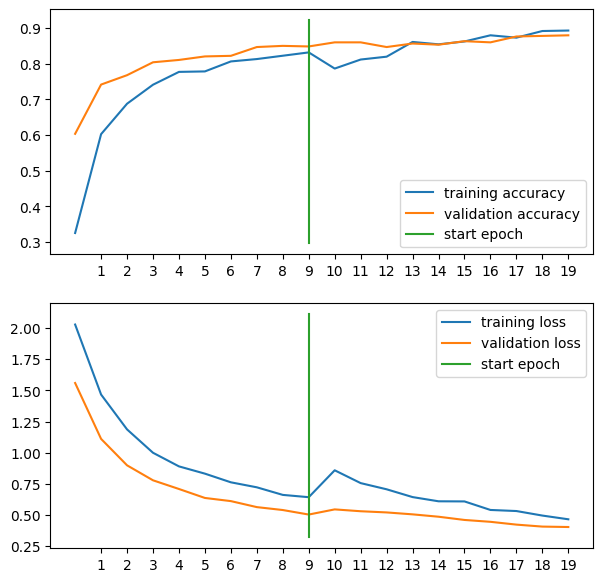

In [ ]:
compare_historys(history_model_1, fine_tune_20_layers_history)

In [ ]:
#recompiling model_1 with default learning_rate
model_1.compile(optimizer=Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
# loading the weights from checkpoint path
model_1.load_weights(checkpoint_path)


In [ ]:
#creating a function to check if the layers of the model are trainable
def check_trainable(model):
  for layer in model.layers:
    print(layer.name, layer.trainable)

#check if the particular layer of a model is trainable
def check_trainable_layer(model, layer_num=2):
  for layer in model.layers[layer_num].layers:
    print(layer.name, layer.trainable)

#turn a set of layers to trainable
def turn_on_trainable_layers(model,number_of_trainable_layers, layer_num=2):
  #turning all layers to trainable
  for layer in model.layers[layer_num].layers:
    layer.trainable = True
  #turning the trainable layers to trainable
  for layer in model.layers[layer_num].layers[:-number_of_trainable_layers]:
    layer.trainable = False



In [ ]:
#checking if model_1 has trainable layers after recompiling
check_trainable(model_1)

input_layer True
augmentation_layer True
efficientnetv2-b0 True
global_avg_pooling_2d True
output_layer True


In [ ]:
#checking for trainable layers in backbone model
check_trainable_layer(model_1)

input_1 True
rescaling True
normalization True
stem_conv True
stem_bn True
stem_activation True
block1a_project_conv True
block1a_project_bn True
block1a_project_activation True
block2a_expand_conv True
block2a_expand_bn True
block2a_expand_activation True
block2a_project_conv True
block2a_project_bn True
block2b_expand_conv True
block2b_expand_bn True
block2b_expand_activation True
block2b_project_conv True
block2b_project_bn True
block2b_drop True
block2b_add True
block3a_expand_conv True
block3a_expand_bn True
block3a_expand_activation True
block3a_project_conv True
block3a_project_bn True
block3b_expand_conv True
block3b_expand_bn True
block3b_expand_activation True
block3b_project_conv True
block3b_project_bn True
block3b_drop True
block3b_add True
block4a_expand_conv True
block4a_expand_bn True
block4a_expand_activation True
block4a_dwconv2 True
block4a_bn True
block4a_activation True
block4a_se_squeeze True
block4a_se_reshape True
block4a_se_reduce True
block4a_se_expand True
bl

In [ ]:
# turning all the layers of the model to trainable
turn_on_trainable_layers(model_1, 30)

In [ ]:
check_trainable_layer(model_1)

input_1 False
rescaling False
normalization False
stem_conv False
stem_bn False
stem_activation False
block1a_project_conv False
block1a_project_bn False
block1a_project_activation False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block3a_expand_conv False
block3a_expand_bn False
block3a_expand_activation False
block3a_project_conv False
block3a_project_bn False
block3b_expand_conv False
block3b_expand_bn False
block3b_expand_activation False
block3b_project_conv False
block3b_project_bn False
block3b_drop False
block3b_add False
block4a_expand_conv False
block4a_expand_bn False
block4a_expand_activation False
block4a_dwconv2 False
block4a_bn False
block4a_activation False
block4a_se_squeeze False
block4a_se_reshape False
block4a

In [ ]:
#recompiling the model
model_1.compile(optimizer=Adam(learning_rate=0.0001),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
#checking number of trainable variables in model_1
len(model_1.trainable_variables)

28

In [ ]:
#fitting the model for finetuning for another 10 epochs
history_model_1_30_layers = model_1.fit(
    train_data_10_percent,
    initial_epoch=10,
    epochs=20,
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

Epoch 11/20
24/24 [==============================] - 25s 559ms/step - loss: 0.8669 - accuracy: 0.8040 - val_loss: 0.5790 - val_accuracy: 0.8421
Epoch 12/20
24/24 [==============================] - 14s 541ms/step - loss: 0.7720 - accuracy: 0.8080 - val_loss: 0.5374 - val_accuracy: 0.8470
Epoch 13/20
24/24 [==============================] - 10s 398ms/step - loss: 0.6844 - accuracy: 0.8413 - val_loss: 0.5211 - val_accuracy: 0.8520
Epoch 14/20
24/24 [==============================] - 11s 438ms/step - loss: 0.6196 - accuracy: 0.8520 - val_loss: 0.4694 - val_accuracy: 0.8668
Epoch 15/20
24/24 [==============================] - 13s 502ms/step - loss: 0.6084 - accuracy: 0.8507 - val_loss: 0.4531 - val_accuracy: 0.8668
Epoch 16/20
24/24 [==============================] - 11s 436ms/step - loss: 0.5641 - accuracy: 0.8747 - val_loss: 0.4189 - val_accuracy: 0.8849
Epoch 17/20
24/24 [==============================] - 12s 480ms/step - loss: 0.5158 - accuracy: 0.8880 - val_loss: 0.4331 - val_accuracy:

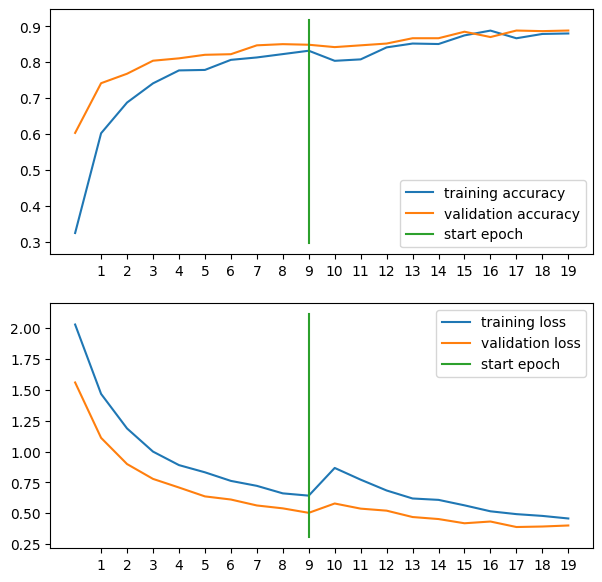

In [ ]:
compare_historys(history_model_1, history_model_1_30_layers, initial_epochs=10)

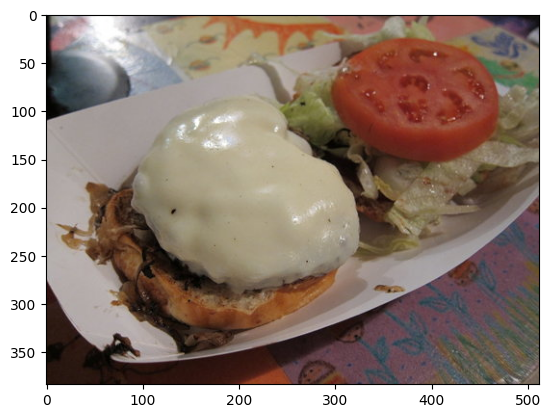

In [ ]:
#visualizing an image from train_data
plt.imshow(plt.imread(train_dir_10_percent+"hamburger/1010140.jpg"))


In [ ]:
train_dir_10_percent

'10_food_classes_10_percent/train/'

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

sushi
583613.jpg


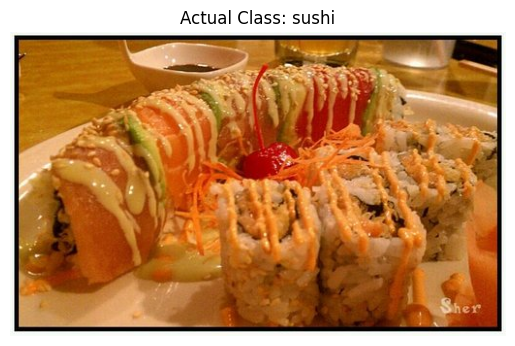

In [ ]:
import os
import random

random_class_name = random.choice(train_data_10_percent.class_names)
print(random_class_name)
image = random.choice(os.listdir(train_dir_10_percent+random_class_name+"/"))
print(image)

img = plt.imread(f"{train_dir_10_percent}{random_class_name}/{image}")
plt.imshow(img)
plt.title(f"Actual Class: {random_class_name}")
plt.axis(False);

In [ ]:
#creating a function to predict on a random image
def pred_random_image(model):
  datasets = [train_dir_10_percent, test_dir_10_percent]
  dataset_dir = random.choice(datasets)
  if dataset_dir == train_dir_10_percent:
    dataset = train_data_10_percent
  else:
    dataset = test_data
  print(dataset_dir)
  random_class_name = random.choice(dataset.class_names)
  image = random.choice(os.listdir(dataset_dir+random_class_name+"/"))
  img = plt.imread(f"{dataset_dir}{random_class_name}/{image}")
  plt.imshow(img)
  #making predictions
  pred_probs = model.predict(np.expand_dims(tf.image.resize(img,(224,224)), axis=0))
  predicted_label = train_data_10_percent.class_names[np.argmax(pred_probs)]

  plt.title(f"Actual Class: {random_class_name}, predicted label : {predicted_label}",
  c="green" if predicted_label == random_class_name else "black")
  plt.axis(False);

10_food_classes_10_percent/test/
1/1 [==============================] - 0s 26ms/step


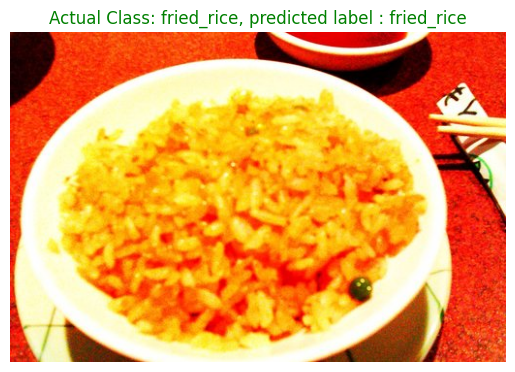

In [ ]:
pred_random_image(model_1)